In [56]:
import sys
sys.path.append('/home/bj/djst2/SOAT-main/')

In [57]:
import os
import torch
import numpy as np

import matplotlib.pyplot as plt
from model import Generator
from util import *

plt.rcParams['figure.dpi'] = 150

ImportError: cannot import name 'TypeGuard' from 'typing_extensions' (/home/bj/conda/envs/djst2/lib/python3.7/site-packages/typing_extensions.py)

In [47]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU가 사용 가능합니다.")
    print("현재 사용 중인 GPU:", torch.cuda.get_device_name(device))
else:
    device = torch.device("cpu")
    print("GPU를 사용할 수 없습니다. CPU 모드로 진행합니다.")

GPU가 사용 가능합니다.
현재 사용 중인 GPU: NVIDIA GeForce RTX 3090 Ti


In [48]:
print("done")

done


## Real World Image

- https://mobile.newsis.com/view.html?ar_id=NISX20211028_0001631529

In [49]:
latent_real = torch.load('inversion_codes/minji.pt')['latent']
latent_real = style2list(latent_real)

source_im, _ = generator1(latent_real)

display_image(source_im)

NameError: name 'style2list' is not defined

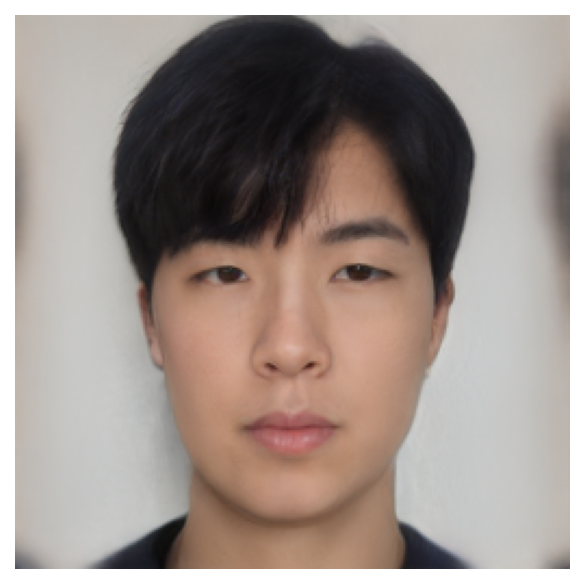

In [149]:
latent_real2 = torch.load('inversion_codes/kdj.pt')['latent']
latent_real2 = style2list(latent_real2)

source_im, _ = generator1(latent_real2)

display_image(source_im)

## Local Image Translation

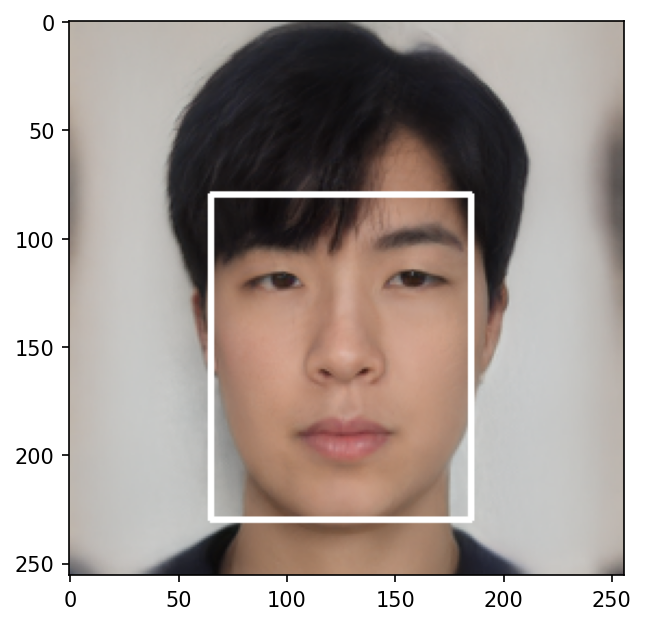

In [159]:
import cv2

rect_img = tensor2image(source_im).copy()

x, y, w, h = 65, 80, 120, 150

cv2.rectangle(rect_img, pt1=(x, y), pt2=(x+w, y+h), thickness=2, color=(255, 255, 255))

plt.imshow(rect_img)

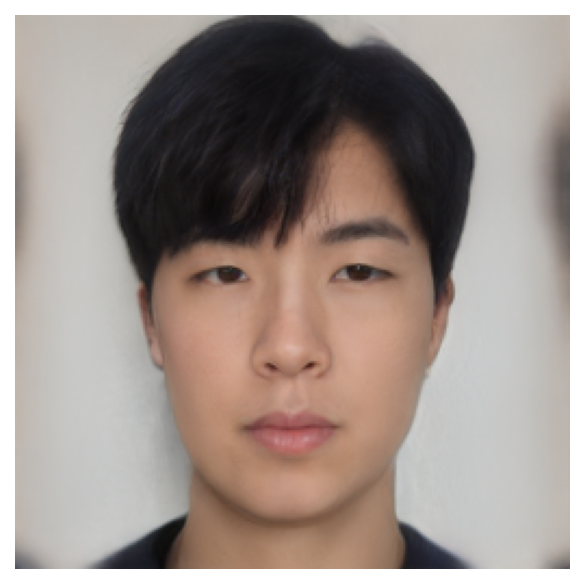

In [160]:
reference_im, _ = generator1(latent_real2)

display_image(reference_im)

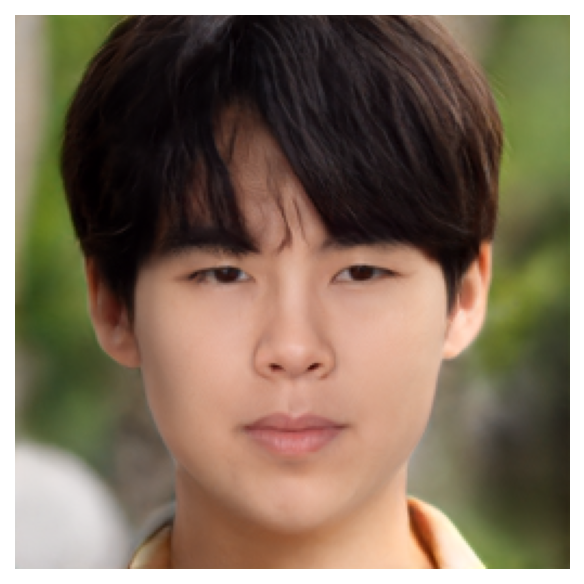

In [161]:
with torch.no_grad():
    blend = generator1.blend_bbox(latent_real, latent_real2, [(x, y, w, h)], model_type='face', num_blend=15)

display_image(blend)